In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
# Read the CSV file into a DataFrame
df = pd.read_csv('../data/raw/Base.csv')

df['fraud_bool'] = df['fraud_bool'].astype('category')
df['payment_type'] = df['payment_type'].astype('category')
df['employment_status'] = df['employment_status'].astype('category')
df['email_is_free'] = df['email_is_free'].astype('category')
df['housing_status'] = df['housing_status'].astype('category')
df['phone_home_valid'] = df['phone_home_valid'].astype('category')
df['phone_mobile_valid'] = df['phone_mobile_valid'].astype('category')
df['has_other_cards'] = df['has_other_cards'].astype('category')
df['foreign_request'] = df['foreign_request'].astype('category')
df['source'] = df['source'].astype('category')
df['device_os'] = df['device_os'].astype('category')

fin_df = df[['fraud_bool','income','credit_risk_score','proposed_credit_limit']]
print(fin_df)

       fraud_bool  income  credit_risk_score  proposed_credit_limit
0               0     0.3                163                 1500.0
1               0     0.8                154                 1500.0
2               0     0.8                 89                  200.0
3               0     0.6                 90                  200.0
4               0     0.9                 91                  200.0
...           ...     ...                ...                    ...
999995          0     0.8                305                 1500.0
999996          0     0.9                235                 1000.0
999997          0     0.8                195                  200.0
999998          0     0.9                148                  200.0
999999          0     0.6                100                  200.0

[1000000 rows x 4 columns]


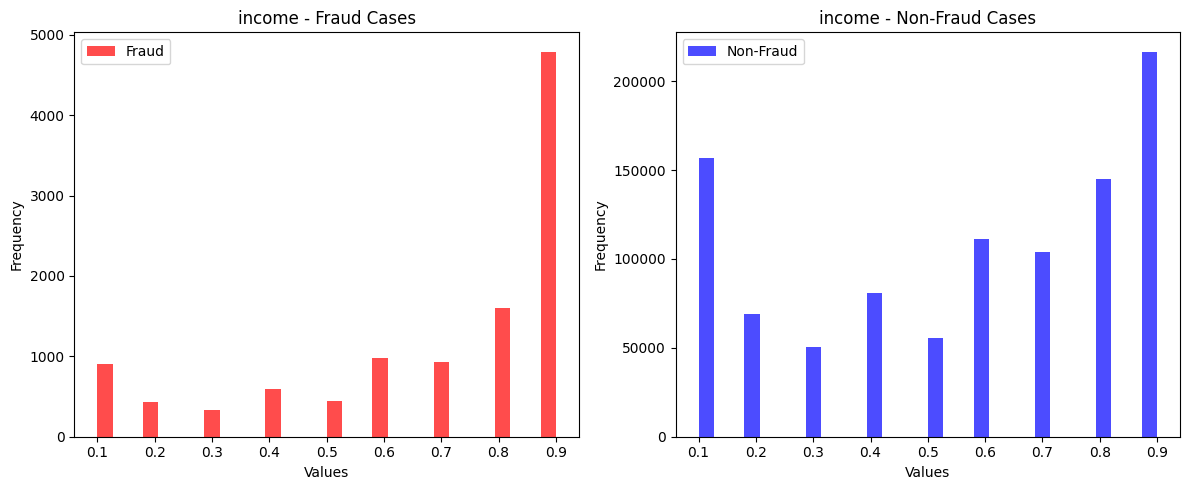

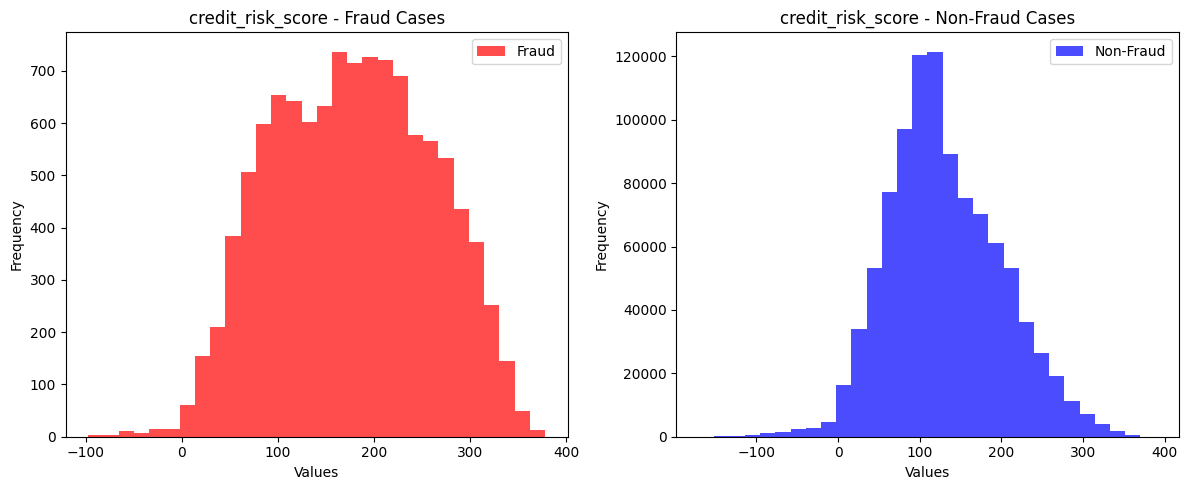

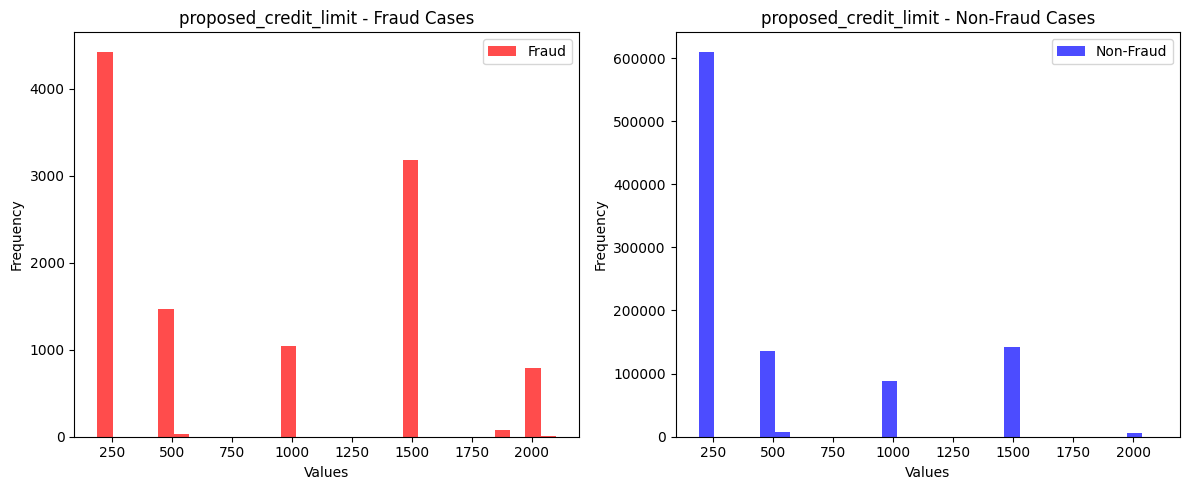

In [19]:
import matplotlib.pyplot as plt

# Extract necessary columns
selected_cols = ['income', 'credit_risk_score', 'proposed_credit_limit']
selected_df = df[selected_cols + ['fraud_bool']]

# Split the data into fraud and non-fraud
fraud_data = selected_df[selected_df['fraud_bool'] == 1]
non_fraud_data = selected_df[selected_df['fraud_bool'] == 0]

# Plot histograms for each variable separately for fraud and non-fraud
for column in selected_cols:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
    
    # Plot for fraud cases
    axes[0].hist(fraud_data[column], bins=30, alpha=0.7, color='red', label='Fraud')
    axes[0].set_title(f'{column} - Fraud Cases')
    axes[0].set_xlabel('Values')
    axes[0].set_ylabel('Frequency')
    axes[0].legend()
    
    # Plot for non-fraud cases
    axes[1].hist(non_fraud_data[column], bins=30, alpha=0.7, color='blue', label='Non-Fraud')
    axes[1].set_title(f'{column} - Non-Fraud Cases')
    axes[1].set_xlabel('Values')
    axes[1].set_ylabel('Frequency')
    axes[1].legend()
    
    plt.tight_layout()
    plt.show()


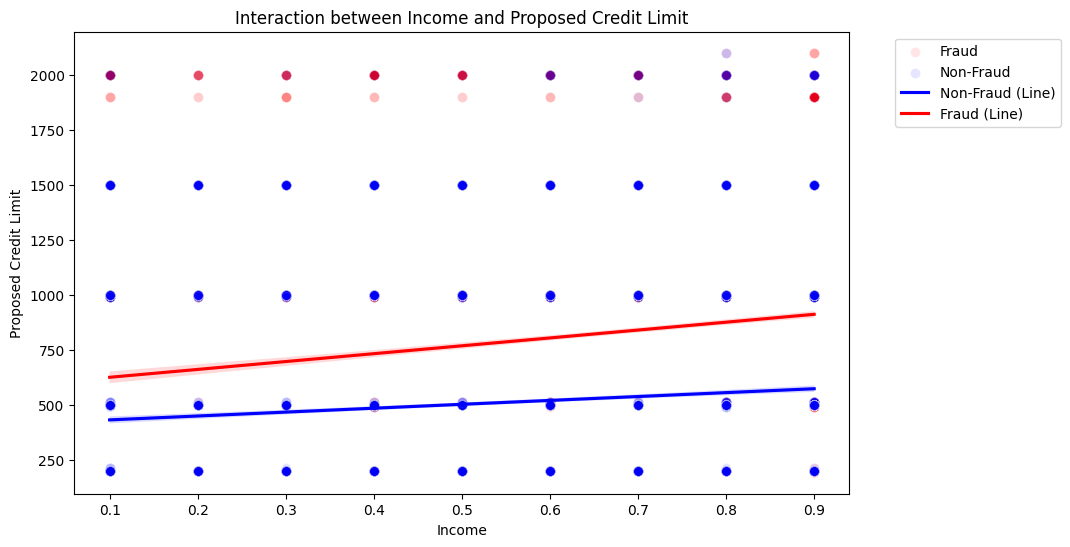

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Undersample the non-fraud data to make it the same size as the fraud data
undersampled_non_fraud_data = non_fraud_data.sample(n=len(fraud_data), random_state=42)

# Plot the scatter plot for fraud data
plt.figure(figsize=(10, 6))
sns.scatterplot(x='income', y='proposed_credit_limit', data=fraud_data, color='red', label='Fraud', s=50,alpha = 0.1)

# Plot the scatter plot for undersampled non-fraud data on the same axes
sns.scatterplot(x='income', y='proposed_credit_limit', data=undersampled_non_fraud_data, color='blue', label='Non-Fraud', s=50,alpha = 0.1)

# Plot a line representing the relationship between 'income' and 'proposed_credit_limit' for the undersampled non-fraud data
sns.regplot(x='income', y='proposed_credit_limit', data=undersampled_non_fraud_data, scatter=False, color='blue', label='Non-Fraud (Line)')
sns.regplot(x='income', y='proposed_credit_limit', data=fraud_data, scatter=False, color='red', label='Fraud (Line)')
plt.title('Interaction between Income and Proposed Credit Limit')
plt.xlabel('Income')
plt.ylabel('Proposed Credit Limit')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust the position of the legend
plt.show()



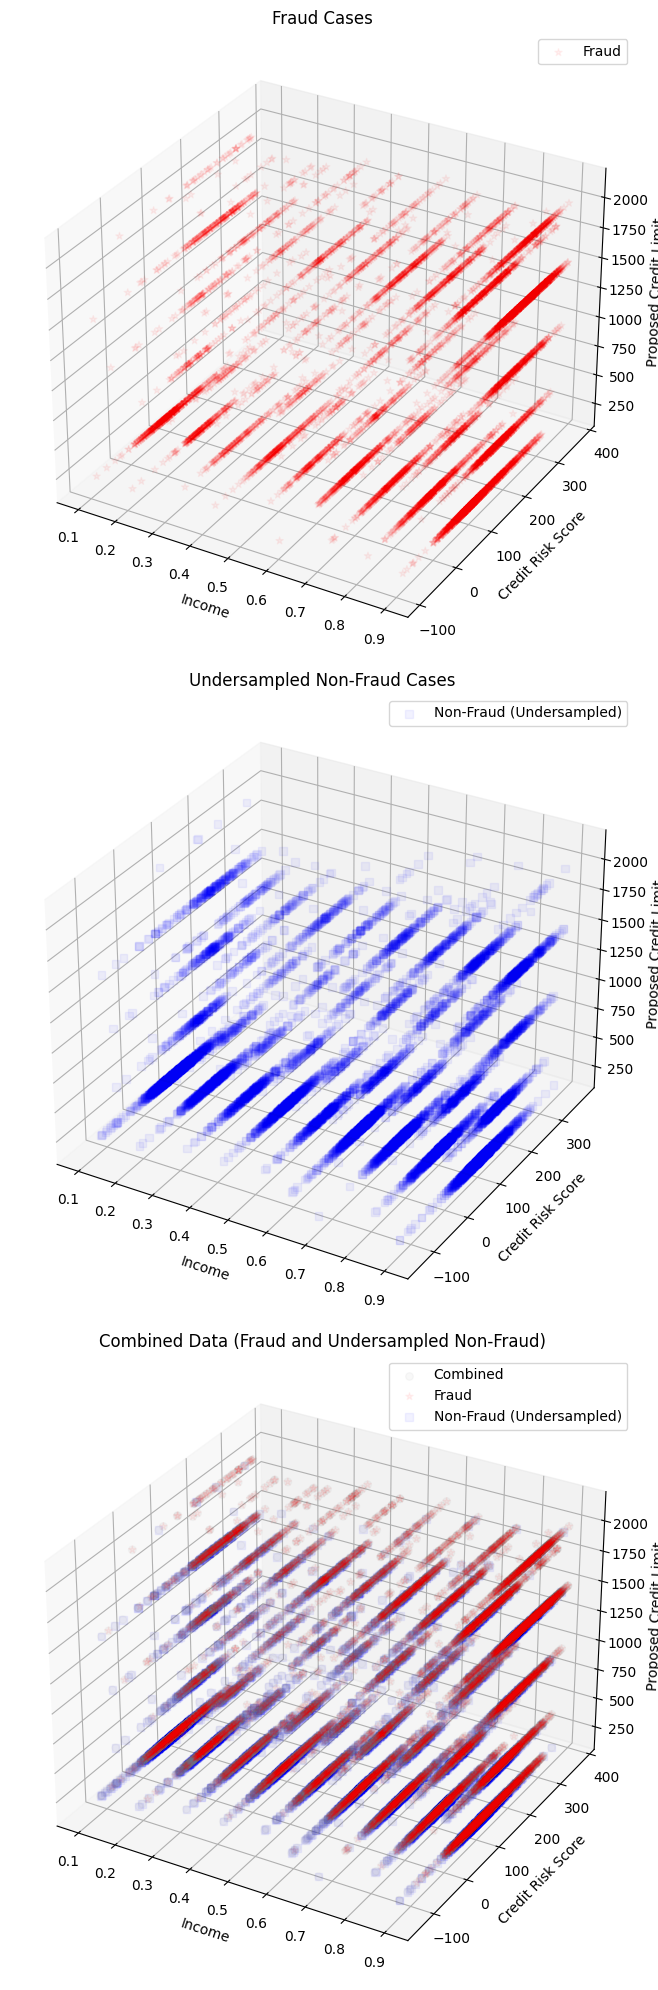

In [60]:
from mpl_toolkits.mplot3d import Axes3D

# Create a figure for the plots
fig, axes = plt.subplots(3, 1, figsize=(10,20), subplot_kw={'projection': '3d'})

# Plot for fraud cases
axes[0].scatter(fraud_data['income'], fraud_data['credit_risk_score'], fraud_data['proposed_credit_limit'], marker='*', c='red', label='Fraud', s=30, alpha=0.05)
axes[0].set_title('Fraud Cases')
axes[0].set_xlabel('Income')
axes[0].set_ylabel('Credit Risk Score')
axes[0].set_zlabel('Proposed Credit Limit')
axes[0].legend()

# Plot for undersampled non-fraud cases
axes[1].scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)
axes[1].set_title('Undersampled Non-Fraud Cases')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Credit Risk Score')
axes[1].set_zlabel('Proposed Credit Limit')
axes[1].legend()

# Plot for combined data
combined_data = pd.concat([fraud_data, undersampled_non_fraud_data])
axes[2].scatter(combined_data['income'], combined_data['credit_risk_score'], combined_data['proposed_credit_limit'], c='gray', label='Combined', s=30, alpha=0.05)
axes[2].scatter(fraud_data['income'], fraud_data['credit_risk_score'], fraud_data['proposed_credit_limit'], marker='*', c='red', label='Fraud', s=30, alpha=0.05)
axes[2].scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)
axes[2].set_title('Combined Data (Fraud and Undersampled Non-Fraud)')
axes[2].set_xlabel('Income')
axes[2].set_ylabel('Credit Risk Score')
axes[2].set_zlabel('Proposed Credit Limit')
axes[2].legend()

plt.tight_layout()
plt.show()


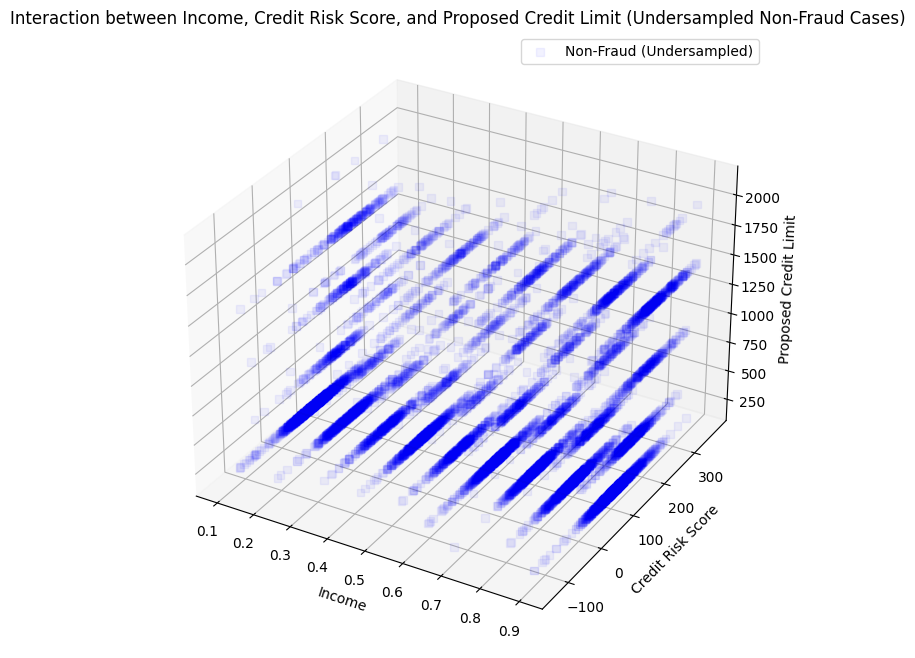

In [47]:
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot for undersampled non-fraud cases
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot undersampled non-fraud data
ax.scatter(undersampled_non_fraud_data['income'], undersampled_non_fraud_data['credit_risk_score'], undersampled_non_fraud_data['proposed_credit_limit'], marker='s', c='blue', label='Non-Fraud (Undersampled)', s=30, alpha=0.05)

ax.set_title('Interaction between Income, Credit Risk Score, and Proposed Credit Limit (Undersampled Non-Fraud Cases)')
ax.set_xlabel('Income')
ax.set_ylabel('Credit Risk Score')
ax.set_zlabel('Proposed Credit Limit')
ax.legend()

plt.show()



In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(fin_df[['income', 'credit_risk_score', 'proposed_credit_limit']], fin_df['fraud_bool'], test_size=0.2, random_state=42)

# Build and train logistic regression models for each combination of hypotheses
models = []

# Example Model 1: Testing H0a (Income > 0.9)
model_1 = LogisticRegression()
model_1.fit(X_train[['income']]>0.9, y_train)  
models.append(model_1)

# Example Model 2: Testing H0b (Credit Risk Score > 150)
model_2 = LogisticRegression()
model_2.fit(X_train[['credit_risk_score']], y_train)  
models.append(model_2)

# Example Model 3: Testing H0c (Proposed Credit Limit > 1000)
model_3 = LogisticRegression()
model_3.fit(X_train[['proposed_credit_limit']], y_train)  
models.append(model_3)

# Evaluate models
for i, model in enumerate(models):
    model_var = ['income', 'credit_risk_score', 'proposed_credit_limit']
    print(model_var[i])
    # Ensure X_test is a DataFrame with a single feature column
    X_test_feature = X_test[[model_var[i]]]
    y_pred = model.predict(X_test_feature)
    print(f"Model {i+1} Accuracy: {accuracy_score(y_test, y_pred)}")
    print(classification_report(y_test, y_pred))



income
Model 1 Accuracy: 0.989455


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.00      0.00      0.00      2109

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

credit_risk_score
Model 2 Accuracy: 0.989455


/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.00      0.00      0.00      2109

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000

proposed_credit_limit
Model 3 Accuracy: 0.989455
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    197891
           1       0.00      0.00      0.00      2109

    accuracy                           0.99    200000
   macro avg       0.49      0.50      0.50    200000
weighted avg       0.98      0.99      0.98    200000



/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [11]:
# Split the data into training and testing sets
income = fin_df[['income']]>=0.9
X_train, X_test, y_train, y_test = train_test_split(income, fin_df['fraud_bool'], test_size=0.2, random_state=42)

# Example Model 1: Testing H0a (Income > 0.9)
model_1 = LogisticRegression()
model_1.fit(X_train, y_train)  
models.append(model_1)

y_pred = model.predict(X_test)
print(f"Model Income Accuracy: {accuracy_score(y_test, y_pred)}")
print(classification_report(y_test, y_pred))



ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- income
Feature names seen at fit time, yet now missing:
- proposed_credit_limit


In [13]:
from statsmodels.stats.proportion import proportions_ztest

# Separate data into two groups based on income
income_greater_than_0_9 = fin_df[fin_df['income'] > 0.9]
income_not_greater_than_0_9 = fin_df[fin_df['income'] <= 0.9]

# Calculate the number of fraud cases in each group
fraud_cases_greater_than_0_9 = income_greater_than_0_9['fraud_bool'].sum()
total_cases_greater_than_0_9 = len(income_greater_than_0_9)
fraud_cases_not_greater_than_0_9 = income_not_greater_than_0_9['fraud_bool'].sum()
total_cases_not_greater_than_0_9 = len(income_not_greater_than_0_9)

# Perform z-test for proportions
count = [fraud_cases_greater_than_0_9, fraud_cases_not_greater_than_0_9]
nobs = [total_cases_greater_than_0_9, total_cases_not_greater_than_0_9]
z_stat, p_value = proportions_ztest(count, nobs, alternative='larger')

# Interpret the results
alpha = 0.05
if p_value < alpha:
    print("Reject null hypothesis: There is evidence to support that fraud is more likely when income > 0.9.")
else:
    print("Fail to reject null hypothesis: There is no evidence to support that fraud is more likely when income > 0.9.")


TypeError: 'Categorical' with dtype category does not support reduction 'sum'